In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('/Users/macbook/Documents/AUA/Business_Analytics/data/marketing_campaign.csv', sep='\t')
df.head(n=5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print("shape of the DataFrame:")
print(df.shape)

shape of the DataFrame:
(2240, 29)


In [4]:
print('columns are')
print(df.columns)

columns are
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


### People

**ID**: Customer's unique identifier <br>
**Year_Birth**: Customer's birth year <br>
**Education**: Customer's education level <br>
**Marital_Status**: Customer's marital status <br>
**Income**: Customer's yearly household income <br>
**Kidhome**: Number of children in customer's household <br>
**Teenhome**: Number of teenagers in customer's household <br>
**Dt_Customer**: Date of customer's enrollment with the company <br>
**Recency**: Number of days since customer's last purchase <br>
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise <br>

### Products

**MntWines**: Amount spent on wine in last 2 years <br>
**MntFruits**: Amount spent on fruits in last 2 years <br>
**MntMeatProducts**: Amount spent on meat in last 2 years <br>
**MntFishProducts**: Amount spent on fish in last 2 years <br>
**MntSweetProducts**: Amount spent on sweets in last 2 years <br>
**MntGoldProds**: Amount spent on gold in last 2 years <br>

### Promotion

**NumDealsPurchases**: Number of purchases made with a discount
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise <br>

### Place

**NumWebPurchases**: Number of purchases made through the company’s website <br>
**NumCatalogPurchases**: Number of purchases made using a catalogue <br>
**NumStorePurchases**: Number of purchases made directly in stores <br>
**NumWebVisitsMonth**: Number of visits to company’s website in the last month <br>

In [5]:
print('data types of each column:')
print(df.dtypes)

data types of each column:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [6]:
print("summary information about the DataFrame:")
df.info()

summary information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 1

In [7]:
print("statistical summary of numerical columns:")
df.describe()

statistical summary of numerical columns:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df['ID'].nunique() == df.shape[0]

True

This means that for each person we have just one row in the dataset. The ID s are unique.

Let's convert non-numeric columns to numeric.

In [12]:
df[['Dt_Customer', 'Marital_Status', 'Education']]

,Dt_Customer,Marital_Status,Education
0,04-09-2012,Single,Graduation
1,08-03-2014,Single,Graduation
2,21-08-2013,Together,Graduation
3,10-02-2014,Together,Graduation
4,19-01-2014,Married,PhD
...,...,...,...
2235,13-06-2013,Married,Graduation
2236,10-06-2014,Together,PhD
2237,25-01-2014,Divorced,Graduation
2238,24-01-2014,Together,Master


In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].dtype

dtype('<M8[ns]')

In [10]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Drop the rows with irrelevant Marital_Status

In [11]:
df = df[~(df['Marital_Status'] == 'Absurd')]

In [12]:
df['Education'].value_counts()

Education
Graduation    1126
PhD            486
Master         369
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [13]:
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})

In [14]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Married',
    'Together': 'Married',
    'Single': 'Single',
    'Alone': 'Single',
    'YOLO': 'Single',
    'Divorced': 'Divorced',
    'Widow': 'Widow'
})


In [15]:
df['Education'].value_counts()

Education
Graduation    1126
Master         572
PhD            486
Basic           54
Name: count, dtype: int64

In [16]:
df['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single       485
Divorced     232
Widow         77
Name: count, dtype: int64

Let's map education and marital status categories to numbers

In [21]:
education_map = {
    'Basic': 0,
    'Graduation': 1,
    'Master': 2,
    'PhD': 3
}
df['Education'] = df['Education'].map(education_map)

marital_map = {
    'Single': 0,
    'Divorced': 1,
    'Widow': 2,
    'Married': 3
}
df['Marital_Status'] = df['Marital_Status'].map(marital_map)

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,1,3,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,3,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,3,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2238 non-null   int64         
 1   Year_Birth           2238 non-null   int64         
 2   Education            2238 non-null   int64         
 3   Marital_Status       2238 non-null   int64         
 4   Income               2214 non-null   float64       
 5   Kidhome              2238 non-null   int64         
 6   Teenhome             2238 non-null   int64         
 7   Dt_Customer          2238 non-null   datetime64[ns]
 8   Recency              2238 non-null   int64         
 9   MntWines             2238 non-null   int64         
 10  MntFruits            2238 non-null   int64         
 11  MntMeatProducts      2238 non-null   int64         
 12  MntFishProducts      2238 non-null   int64         
 13  MntSweetProducts     2238 non-null   i

In [23]:
df.head(n = 2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,1,0,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1,0,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Now lets explore and modify some of the columns for better interpretability in the later analysis.

In [39]:
df['Year_Birth']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2238, dtype: int64

Instead of birth year it is better to have the age of a person. The year of dataset is 2015, so let's compute customer's age

In [17]:
df['Age'] = 2015 - df['Year_Birth']

In [18]:
df['Total_Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [19]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Remove Z_Revenue and Z_CostContact as they are constant

In [20]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

Let's remove outliers in Income and Total Spending

In [29]:
df = df[~(df['Age'] > 100) | (df['Age'] < 6)]

In [21]:
for col in ['Income','Total_Spend']:
    if col in df.columns:
        low = df[col].quantile(0.01)
        high = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=low, upper=high)
    else:
        pass

In [22]:
accepted_cols = [c for c in ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'] if c in df.columns]
if 'Campaign_Acceptance_Total' not in df.columns and accepted_cols:
    df['Campaign_Acceptance_Total'] = df[accepted_cols].sum(axis=1)

In [23]:
df['Total_Spend']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spend, Length: 2238, dtype: int64

In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Spend',
       'Children', 'Campaign_Acceptance_Total'],
      dtype='object')

In [30]:
df.to_csv('/Users/macbook/Documents/AUA/Business_Analytics/data/marketing_campaign_cleaned.csv', index=False)

['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Spend', 'Children']


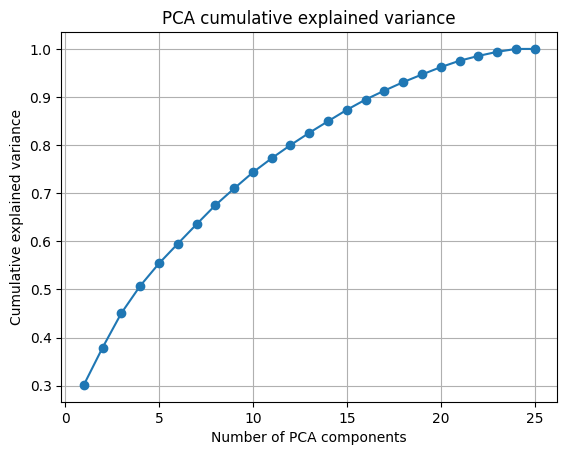

In [41]:
# --- 1.5 Choose modeling features ---
features = [
      'Education', 'Marital_Status', 'Income', 'Recency', 
      'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
      'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
      'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
      'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 
      'Total_Spend', 'Children'
]
print(features)
# fill numeric NA with median
for c in features:
    if df[c].isnull().any():
        df[c] = df[c].fillna(df[c].median())

# --- Standardize ---
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# --- PCA ---
pca = PCA()
X_pca_full = pca.fit_transform(X)
cumvar = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance (matplotlib only)
plt.figure()
plt.plot(np.arange(1, len(cumvar)+1), cumvar, marker='o')
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA cumulative explained variance')
plt.grid(True)
plt.show()

17
Using n_components = 17, cumulative variance = 0.913
k=2 silhouette=0.2877
k=3 silhouette=0.1940
k=4 silhouette=0.1946
k=5 silhouette=0.2025
k=6 silhouette=0.1951
k=7 silhouette=0.2060
k=8 silhouette=0.1356


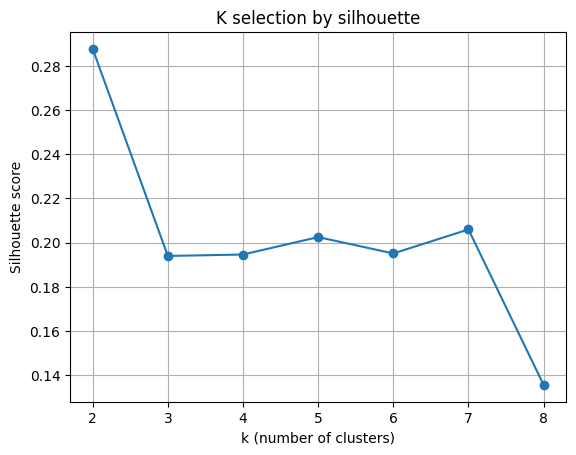

Selected best_k = 2 with silhouette = 0.2877


In [ ]:
# choose n_components explaining >= 90% variance (fallback to 3)
if np.any(cumvar >= 0.90):
    n_components = int(np.searchsorted(cumvar, 0.90) + 1)
else:
    n_components = min(3, X_pca_full.shape[1])
print(f"Using n_components = {n_components}, cumulative variance = {cumvar[n_components-1]:.3f}")

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# --- KMeans clustering: choose k by silhouette score (k=2..8) ---
silhouette_scores = {}
for k in range(2, min(9, len(df))):   # k up to 8 or number of rows if small dataset
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores[k] = score
    print(f"k={k} silhouette={score:.4f}")

# plot silhouette vs k
plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette score')
plt.title('K selection by silhouette')
plt.grid(True)
plt.show()

# pick best k automatically (largest silhouette)
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Selected best_k = {best_k} with silhouette = {silhouette_scores[best_k]:.4f}")

# fit final KMeans
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
df['cluster'] = kmeans_final.fit_predict(X_pca)


In [43]:
# --- Cluster profiling ---
profile_cols = [
    'cluster', 'Total_Spend', 'Total_Spend_wins', 'Income', 'Income_wins',
    'Age', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases',
    'NumWebVisitsMonth', 'NumDealsPurchases', 'Campaign_Acceptance_Total'
]
profile_cols = [c for c in profile_cols if c in df.columns]
cluster_profile = df.groupby('cluster')[profile_cols].agg(['count','mean','median']).round(2)
cluster_profile.columns = ['_'.join(col).strip() for col in cluster_profile.columns.values]
cluster_profile = cluster_profile.reset_index()

print("\nCluster sizes:")
print(df['cluster'].value_counts().sort_index())

print("\nCluster profile (first rows):")
print(cluster_profile.head())


Cluster sizes:
cluster
0    1385
1     853
Name: count, dtype: int64

Cluster profile (first rows):
   cluster  cluster_count  cluster_mean  cluster_median  Total_Spend_count  \
0        0           1385           0.0             0.0               1385   
1        1            853           1.0             1.0                853   

   Total_Spend_mean  Total_Spend_median  Income_count  Income_mean  \
0            198.44                95.0          1385      39417.0   
1           1261.29              1192.0           853      71768.3   

   Income_median  ...  NumCatalogPurchases_median  NumWebVisitsMonth_count  \
0        38829.0  ...                         1.0                     1385   
1        71866.0  ...                         5.0                      853   

   NumWebVisitsMonth_mean  NumWebVisitsMonth_median  NumDealsPurchases_count  \
0                    6.35                       7.0                     1385   
1                    3.64                       3.0       

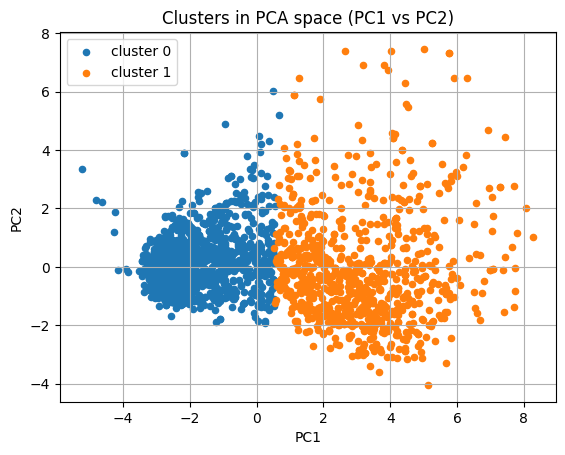

In [44]:
plt.figure()
if X_pca.shape[1] >= 2:
    for cl in sorted(df['cluster'].unique()):
        mask = df['cluster'] == cl
        plt.scatter(X_pca[mask,0], X_pca[mask,1], label=f'cluster {cl}', s=20)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Clusters in PCA space (PC1 vs PC2)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Only 1 PCA component available — skipping 2D PCA scatter.")


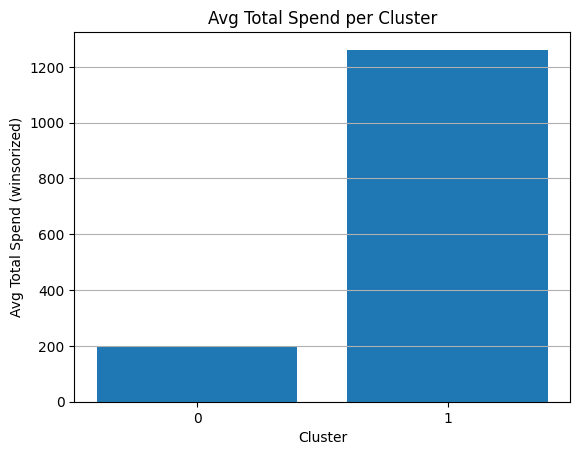

In [45]:
if 'Total_Spend' in df.columns:
    avg_spend = df.groupby('cluster')['Total_Spend'].mean().sort_index()
    plt.figure()
    plt.bar(avg_spend.index.astype(str), avg_spend.values)
    plt.xlabel('Cluster')
    plt.ylabel('Avg Total Spend (winsorized)')
    plt.title('Avg Total Spend per Cluster')
    plt.grid(axis='y')
    plt.show()


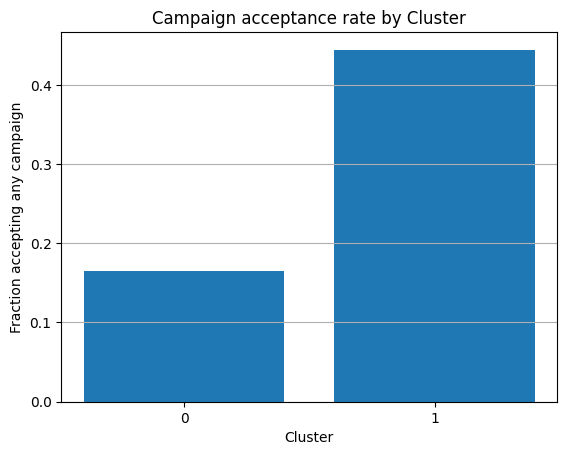

In [46]:
if 'Campaign_Acceptance_Total' in df.columns:
    acceptance = df.groupby('cluster')['Campaign_Acceptance_Total'].apply(lambda x: (x>0).mean())
    plt.figure()
    plt.bar(acceptance.index.astype(str), acceptance.values)
    plt.xlabel('Cluster')
    plt.ylabel('Fraction accepting any campaign')
    plt.title('Campaign acceptance rate by Cluster')
    plt.grid(axis='y')
    plt.show()

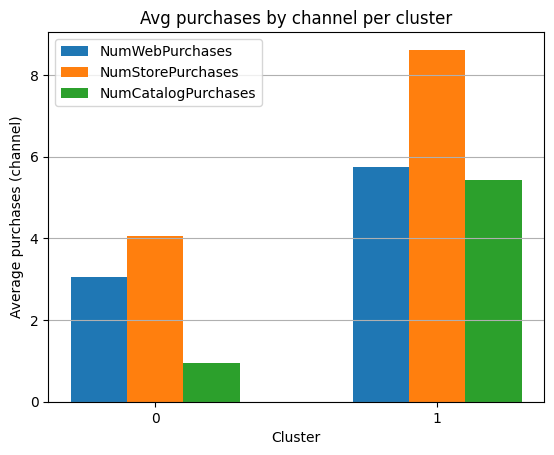

In [47]:
channels = [c for c in ['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'] if c in df.columns]
if channels:
    channel_avgs = df.groupby('cluster')[channels].mean().reset_index()
    x = np.arange(len(channel_avgs['cluster']))
    width = 0.2
    plt.figure()
    for i, ch in enumerate(channels):
        plt.bar(x + i*width, channel_avgs[ch].values, width, label=ch)
    plt.xticks(x + width*(len(channels)-1)/2, channel_avgs['cluster'].astype(str))
    plt.xlabel('Cluster')
    plt.ylabel('Average purchases (channel)')
    plt.title('Avg purchases by channel per cluster')
    plt.legend()
    plt.grid(axis='y')
    plt.show()


In [48]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Spend',
       'Children', 'Campaign_Acceptance_Total', 'cluster'],
      dtype='object')

Features <br>
I selected numeric variables that actually matter for campaign response: <br>
Age <br>
Income <br>
Household structure (Kids, Teens, Children) <br>
Marketing engagement (purchases, visits) <br>
Spending <br>
Total number of past campaign acceptances <br>


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

features = [
    'Age', 'Income', 'Recency', 'Kidhome', 'Teenhome',
    'Total_Spend', 'Children',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth',
    'Campaign_Acceptance_Total'
]

X = df[features]
y = df['Response']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9196428571428571

Confusion Matrix:
 [[463  14]
 [ 31  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       477
           1       0.79      0.63      0.70        83

    accuracy                           0.92       560
   macro avg       0.86      0.80      0.83       560
weighted avg       0.92      0.92      0.92       560



In [68]:
# --- RFM ---
df['R'] = df['Recency']                            # lower = better
df['F'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['M'] = df['Total_Spend']

# Replace zeros in F or M (needed for scoring)
df['F'] = df['F'].replace(0, 1)
df['M'] = df['M'].replace(0, 1)

# --- RFM Scoring (1–5) ---
df['R_Score'] = pd.qcut(df['R'], 5, labels=[5,4,3,2,1]).astype(int)
df['F_Score'] = pd.qcut(df['F'], 5, labels=[1,2,3,4,5]).astype(int)
df['M_Score'] = pd.qcut(df['M'], 5, labels=[1,2,3,4,5]).astype(int)

# --- Combine RFM ---
df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']
df['RFM_Class'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)


In [69]:
def rfm_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    if r >= 3 and f >= 3:
        return 'Loyal'
    if r >= 4 and f <= 2:
        return 'Recent Customers'
    if r <= 2 and f >= 4:
        return 'Potential Loyalists'
    if r == 1 and f <= 2 and m <= 2:
        return 'At Risk'
    return 'Others'

df['RFM_Segment'] = df.apply(rfm_segment, axis=1)


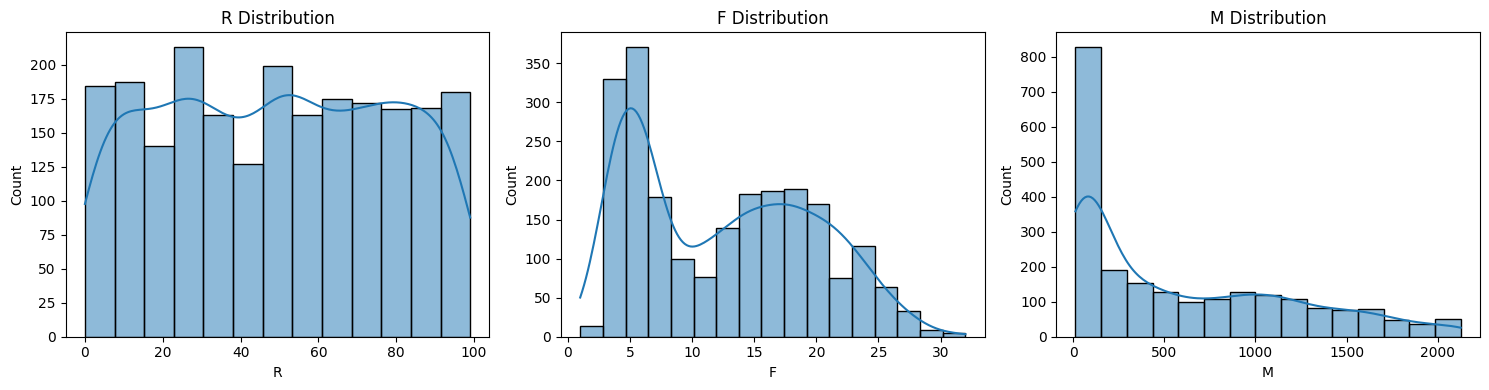

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,4))

for i, col in enumerate(['R', 'F', 'M']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()


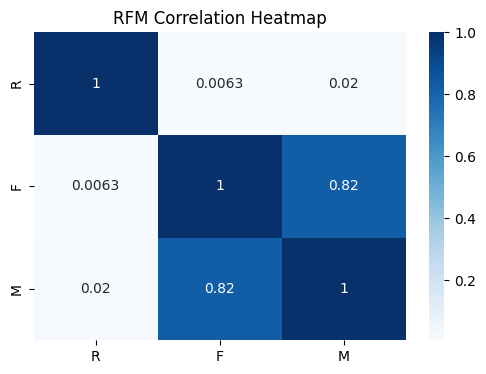

In [71]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['R', 'F', 'M']].corr(), annot=True, cmap='Blues')
plt.title("RFM Correlation Heatmap")
plt.show()


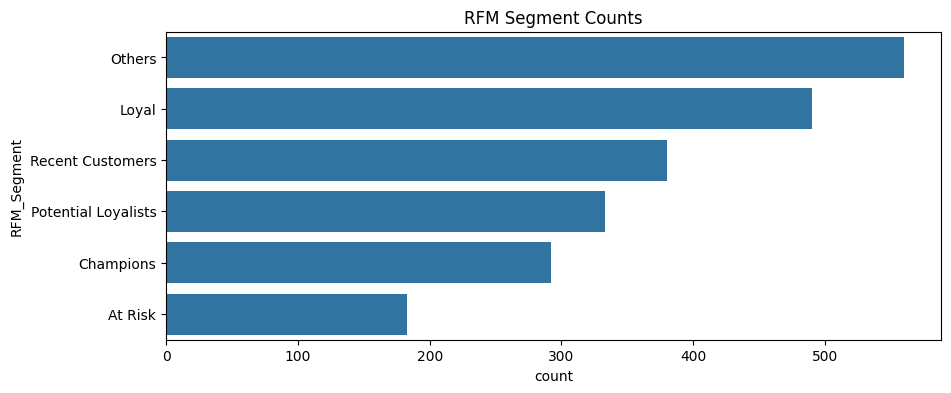

In [72]:
plt.figure(figsize=(10,4))
sns.countplot(y='RFM_Segment', data=df, order=df['RFM_Segment'].value_counts().index)
plt.title("RFM Segment Counts")
plt.show()



In [73]:
# Numeric columns to summarize
profile_cols = ['R','F','M','RFM_Score']

segment_profile = df.groupby('RFM_Segment')[profile_cols].agg(['count','mean','median']).round(2)
# Flatten multi-level columns
segment_profile.columns = ['_'.join(col).strip() for col in segment_profile.columns.values]
segment_profile = segment_profile.reset_index()

# Show the table
print(segment_profile)


           RFM_Segment  R_count  R_mean  R_median  F_count  F_mean  F_median  \
0              At Risk      183   88.77      89.0      183    5.26       5.0   
1            Champions      292   18.97      19.5      292   20.99      21.0   
2                Loyal      490   35.22      40.5      490   15.90      15.0   
3               Others      560   66.19      67.0      560    7.82       7.0   
4  Potential Loyalists      333   79.29      80.0      333   20.50      20.0   
5     Recent Customers      380   19.43      19.0      380    5.18       5.0   

   M_count   M_mean  M_median  RFM_Score_count  RFM_Score_mean  \
0      183    70.56      55.0              183            3.92   
1      292  1229.56    1174.0              292           13.50   
2      490   808.14     607.0              490           11.04   
3      560   275.55     103.0              560            6.38   
4      333  1203.09    1161.0              333           10.36   
5      380    73.32      57.0              

/var/folders/pg/mbs0gyqj0290_xhf4r00d2mw0000gn/T/ipykernel_60342/3298705922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_rate.index, y=response_rate.values, palette='viridis')


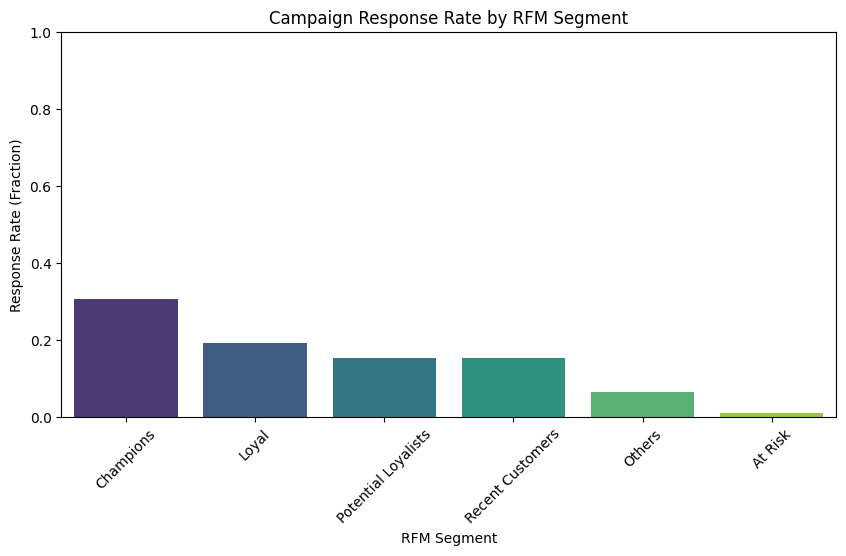

In [74]:
# Fraction of customers who responded in each segment
response_rate = df.groupby('RFM_Segment')['Response'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=response_rate.index, y=response_rate.values, palette='viridis')
plt.ylabel('Response Rate (Fraction)')
plt.xlabel('RFM Segment')
plt.title('Campaign Response Rate by RFM Segment')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()


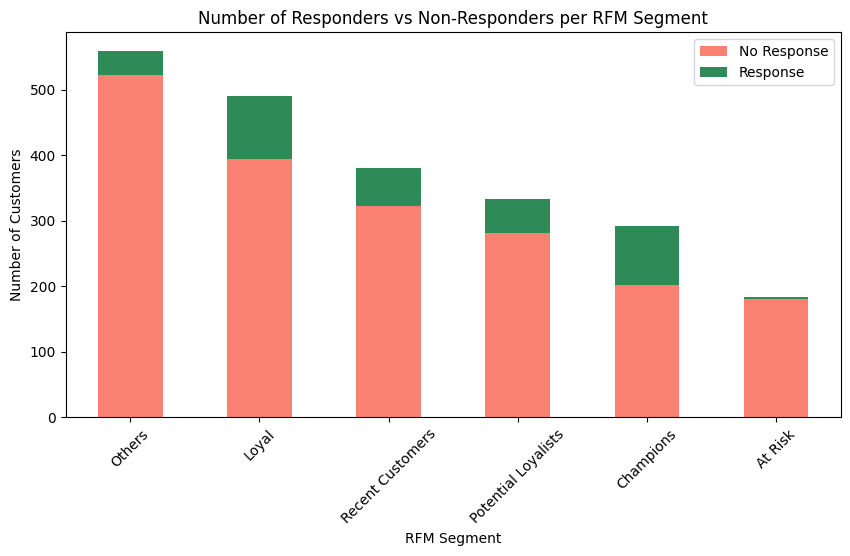

In [75]:
response_counts = df.groupby(['RFM_Segment','Response']).size().unstack(fill_value=0)
response_counts = response_counts.loc[df['RFM_Segment'].value_counts().index]  # sort by segment frequency

response_counts.plot(kind='bar', stacked=True, figsize=(10,5), color=['salmon','seagreen'])
plt.ylabel('Number of Customers')
plt.xlabel('RFM Segment')
plt.title('Number of Responders vs Non-Responders per RFM Segment')
plt.xticks(rotation=45)
plt.legend(['No Response','Response'])
plt.show()


In [76]:
# List of all campaign columns
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

# Ensure all are numeric
df[campaign_cols] = df[campaign_cols].astype(int)

# Average acceptance per RFM segment
campaign_segment_avg = df.groupby('RFM_Segment')[campaign_cols].mean().sort_values('Response', ascending=False)

# Display table
print(campaign_segment_avg)


                     AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
RFM_Segment                                                                   
Champions                0.171233      0.027397      0.106164      0.130137   
Loyal                    0.077551      0.010204      0.061224      0.104082   
Potential Loyalists      0.132132      0.036036      0.075075      0.150150   
Recent Customers         0.000000      0.005263      0.089474      0.002632   
Others                   0.019643      0.005357      0.064286      0.046429   
At Risk                  0.000000      0.000000      0.038251      0.005464   

                     AcceptedCmp5  Response  
RFM_Segment                                  
Champions                0.184932  0.308219  
Loyal                    0.079592  0.193878  
Potential Loyalists      0.171171  0.153153  
Recent Customers         0.000000  0.152632  
Others                   0.021429  0.066071  
At Risk                  0.000000  0.010929  

<Figure size 1200x600 with 0 Axes>

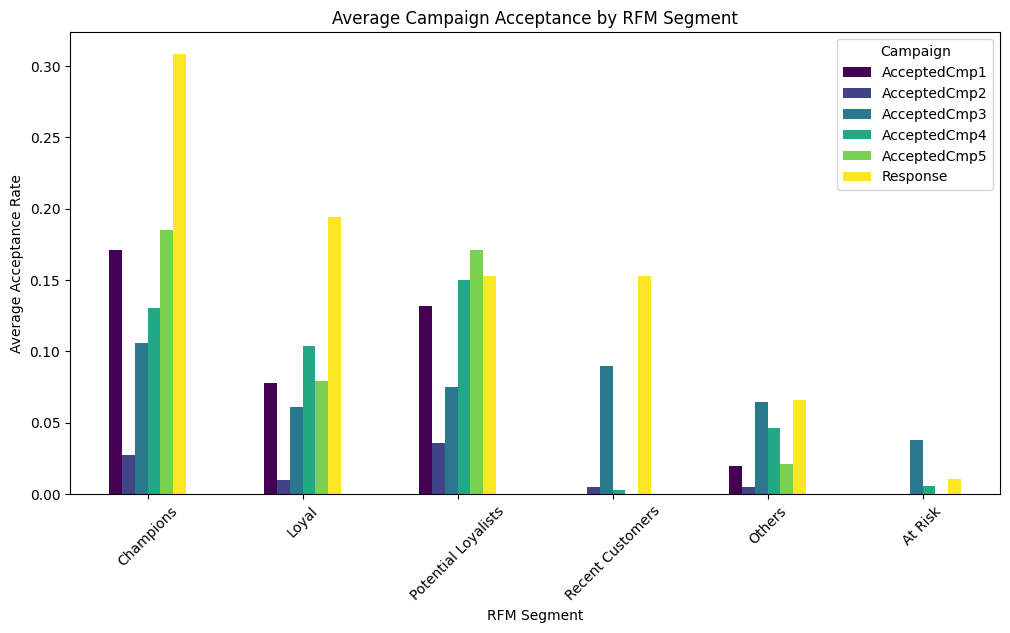

In [77]:
plt.figure(figsize=(12,6))
campaign_segment_avg.plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.ylabel('Average Acceptance Rate')
plt.xlabel('RFM Segment')
plt.title('Average Campaign Acceptance by RFM Segment')
plt.xticks(rotation=45)
plt.legend(title='Campaign')
plt.show()
